In [ ]:
# Import relevant stuff
import pandas as pd
import numpy as np
from ast import literal_eval

In [15]:
# Goes from a list stored in a df to just the value inside.
def fix_list_format(df, col_title):
    fixed_row = []
    for index, row in df.iterrows():
        str1 = row[col_title]
        if len(str1) > 2:
            fixed_row.append(row[col_title][1:-1])
        else:
            fixed_row.append(np.nan)
    df[col_title] = fixed_row

In [16]:
# Load mp-stable matches (2.1k)
df0 = pd.read_excel("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/only_stable_mp_matches.xlsx")
df0 = df0.drop('material_dict_queried', axis=1)
df0['material_dict'] = df0['material_dict'].apply(literal_eval) #convert to list type
fix_list_format(df0, 'unit_cell_volumes')
df0_normalized = pd.json_normalize(df0['material_dict'])
df0_exploded = pd.concat([df0, df0_normalized], axis=1)
df0_exploded.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,matches_by_element,matches_by_dict,...,Dy,Er,Ho,Tm,Br,Nd,Hg,Cl,Tc,Mn
0,[18852],Ag1B2,Ag1B2,"{'Ag': 1.0, 'B': 2.0}",6.7,6.7,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[20016],Ag1Ba2Ca2Cu3O9-z,Ag1Ba2Ca2Cu3O9,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 2.0, 'Cu': 3.0, '...",110,110.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[20017],Ag1Ba2Ca3Cu4O11-z,Ag1Ba2Ca3Cu4O11,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 3.0, 'Cu': 4.0, '...",117,117.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[20018],Ag1Ba2Ca4Cu5O13-z,Ag1Ba2Ca4Cu5O13,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 4.0, 'Cu': 5.0, '...",105,105.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[20019],Ag1Ba2Ca5Cu6O15-z,Ag1Ba2Ca5Cu6O15,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 5.0, 'Cu': 6.0, '...",80,80.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Load all non-doped unique materials (14k)
df2 = pd.read_json("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/non_doped_materials.json")
df_normalized = pd.json_normalize(df2['material_dict'])
df2_exploded = pd.concat([df2, df_normalized], axis=1)
df2_exploded.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,Ag,B,...,Dy,Er,Ho,Tm,Br,Nd,Hg,Cl,Tc,Mn
0,[18852],Ag1B2,Ag1B2,"{'Ag': 1.0, 'B': 2.0}",6.7,6.7,0.0,1,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[20016],Ag1Ba2Ca2Cu3O9-z,Ag1Ba2Ca2Cu3O9,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 2.0, 'Cu': 3.0, '...",110.0,110.0,0.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[20017],Ag1Ba2Ca3Cu4O11-z,Ag1Ba2Ca3Cu4O11,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 3.0, 'Cu': 4.0, '...",117.0,117.0,0.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[20018],Ag1Ba2Ca4Cu5O13-z,Ag1Ba2Ca4Cu5O13,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 4.0, 'Cu': 5.0, '...",105.0,105.0,0.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[20019],Ag1Ba2Ca5Cu6O15-z,Ag1Ba2Ca5Cu6O15,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 5.0, 'Cu': 6.0, '...",80.0,80.0,0.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Load all non-doped unique materials (14k)
df3 = pd.read_json("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/data-prep/unique_materials_14k.json")
df_normalized = pd.json_normalize(df3['material_dict'])
df3_exploded = pd.concat([df3, df_normalized], axis=1)
df3_exploded.shape

(14577, 85)

In [35]:
# Load element-data
element_data = pd.read_csv("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/element_data.csv")
element_data = element_data.drop("Unnamed: 0", axis=1)
numeric_columns = element_data.select_dtypes(include=np.number).columns
element_data = element_data[[element_data.columns[0]] + list(numeric_columns)]
element_data.head()

,Element,AtomicMass,AtomicNumber,FirstIonizationEnergy,AtomicRadius,BoilingPoint,BrinellHardness,CovalentRadius,Density,ElectricalConductivity,...,Resistivity,SoundSpeed,SpaceGroupNumber,SpecificHeat,ThermalConductivity,ThermalExpansion,Valence,VaporizationHeat,VolumeMagneticSusceptibility,SuperconductingPoint
0,H,1.007940,1,1311.3,53.0,-252.87,NaN,31,0.0899,NaN,...,NaN,1270.0,194.0,14300.0,0.1805,NaN,1,0.452,-2.230000e-09,NaN
1,He,4.002602,2,2361.3,31.0,-268.93,NaN,28,0.1785,NaN,...,NaN,970.0,225.0,5193.1,0.1513,NaN,0,0.083,-1.050000e-09,NaN
2,Li,6.941000,3,519.9,167.0,1342.00,NaN,128,535.0000,1.100000e+07,...,9.400000e-08,6000.0,229.0,3570.0,85.0000,0.000046,1,147.000,1.370000e-05,NaN
3,Be,9.012182,4,898.8,112.0,2470.00,600.0,96,1848.0000,2.500000e+07,...,4.000000e-08,13000.0,194.0,1820.0,190.0000,0.000011,2,297.000,-2.328000e-05,0.026
4,B,10.811000,5,800.2,87.0,4000.00,NaN,85,2460.0000,1.000000e-04,...,1.000000e+04,16200.0,166.0,1030.0,27.0000,0.000006,3,507.000,-2.140000e-05,NaN


#### **Hamidieh-style model using element data**

In [37]:
# Choose the dataframe to use:
df_used = df3_exploded
df_used.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,Ag,Al,...,Sm,Dy,Ir,K,Rb,Cs,Tm,Br,Cl,Tc
0,[12787],Ag0.002Al0.998,Ag0.002Al0.998,"{'Ag': 0.002, 'Al': 0.998}",1.128,1.128,0.0,1,0.002,0.998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[12816],Ag0.005Zn0.995,Ag0.005Zn0.995,"{'Ag': 0.005, 'Zn': 0.995}",0.763,0.763,0.0,1,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[25145],Bi3.99Ag0.01S3O4,Bi3.99Ag0.01S3O4,"{'Ag': 0.01, 'Bi': 3.99, 'O': 4.0, 'S': 3.0}",4.310,4.310,0.0,1,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[23179],Sr1Pd1.98Ag0.02Ge2,Sr1Pd1.98Ag0.02Ge2,"{'Ag': 0.02, 'Ge': 2.0, 'Pd': 1.98, 'Sr': 1.0}",2.640,2.640,0.0,1,0.020,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[25146],Bi3.97Ag0.03S3O4,Bi3.97Ag0.03S3O4,"{'Ag': 0.03, 'Bi': 3.9699999999999998, 'O': 4....",4.200,4.200,0.0,1,0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# # 30m runtime !!!
# from numpy.ma.core import mean
# from scipy.stats import gmean
# from statsmodels.stats.weightstats import DescrStatsW
#
# # We are going to create a 3D space (np array) with coordinates (feature, property, material_name)
#
# data = np.empty((len(df_used),30,9), dtype=object)
# data.fill(None)
#
# # Iterate over every *material*
# for material_index, row in df_used.iterrows():
#
#   # Get the formula/name of the material early
#   material_formula = row[0]
#
#   # NEXT TWO LINES CONTAIN MAGIC NUMBERS
#   # Get the total number of atoms in a material.
#   n_atoms = np.nansum(row[8:85])
#
#   # get a series object of all the elements and how there are in the mat.
#   elem_row = row[8:85]
#
#   # Create a Boolean mask for non-null entries
#   mask = elem_row.notna()
#
#   # Get intermediate variables to calculate features ---
#   atom_name_list = []
#   p_list = []
#
#   for index1, value1 in elem_row[mask].iteritems():
#     atom_name_list.append(index1)
#     p_list.append( value1 / n_atoms)
#
#   # Iterate over every *property*
#   for property_index, property_name in enumerate(element_data.columns[1:31]):
#
#     t_list = []
#
#     # Go through the atoms
#     for index2, value2 in elem_row[mask].items():
#
#       # Find the row where 'Element' matches the value of index2
#       element_row = element_data[element_data['Element'] == index2]
#
#       # Extract the value from the specified column (property_name)
#       property_value = element_row[property_name].values[0]
#
#       # Append the property value to t_list
#       t_list.append(property_value)
#
#     p_list = np.array(p_list)
#     t_list = np.array(t_list)
#     w_list = t_list / np.sum(t_list) # Could be wrong
#
#     # Add into our *3D-magic-thing* this coordinate.
#     data[material_index][property_index][0] = np.mean(t_list)
#     data[material_index][property_index][1] = np.dot(t_list, p_list)
#     data[material_index][property_index][2] = gmean(t_list)
#     data[material_index][property_index][3] = np.prod(np.power(t_list, p_list))
#     data[material_index][property_index][4] = -np.sum(w_list * np.log(w_list))
#     data[material_index][property_index][5] = np.ptp(t_list)
#     data[material_index][property_index][6] = np.ptp(np.multiply(t_list, p_list))
#     data[material_index][property_index][7] = np.std(t_list)
#     data[material_index][property_index][8] = DescrStatsW(t_list, weights=p_list).std

C:\Users\Droor\AppData\Local\Temp\ipykernel_6404\1558332072.py:30: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index1, value1 in elem_row[mask].iteritems():
C:\Users\Droor\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:267: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
C:\Users\Droor\AppData\Local\Temp\ipykernel_6404\1558332072.py:59: RuntimeWarning: invalid value encountered in power
  data[material_index][property_index][3] = np.prod(np.power(t_list, p_list))
C:\Users\Droor\AppData\Local\Temp\ipykernel_6404\1558332072.py:60: RuntimeWarning: invalid value encountered in log
  data[material_index][property_index][4] = -np.sum(w_list * np.log(w_list))
C:\Users\Droor\AppData\Local\Temp\ipykernel_6404\1558332072.py:60: RuntimeWarning: divide by zero encountered in log
  data[material_index][property_index][4] = -np.sum(w_list * np.log(w_list))
C:\Users\Droor\AppData\Local\Temp\ipykernel_6404\1558332

In [46]:
# # STEPS to go from 3d and collapse down to 2d to get all features of a property (10*30 = 300 features total)

# # Step 1: Create column names for the features
# column_names = ['mean', 'weighted_mean', 'geom_mean', 'weighted_geom_mean',
#                 'entropy', 'range', 'weighted_range', 'std', 'weighted_std']
#
# # Step 2: Create an empty dictionary
# new_columns = {}
#
# # Step 3: Iterate over each material
# for material_index, row in df_used.iterrows():
#
#   # Step 4: Iterate over each property
#   for property_index, property_name in enumerate(element_data.columns[1:31]):
#
#     # Step 5: Iterate over each feature index
#     for feature_index in range(9):
#
#       # Step 6: Retrieve the feature value
#       feature_value = data[material_index][property_index][feature_index]
#
#       # Step 7: Assign the feature value to the dictionary with unique column name
#       column_name = f'{property_name}_{column_names[feature_index]}'
#       new_columns.setdefault(column_name, []).append(feature_value)
#
# # Step 8: Create a DataFrame from the dictionary
# new_columns_df = pd.DataFrame(new_columns)
#
# # Step 9: Merge the new DataFrame with df_used
# updated_df = pd.merge(df_used, new_columns_df, left_index=True, right_index=True)

In [48]:
# # Uncomment based on what you want to do.

updated_df = pd.read.json("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/machine-learning/df_unique_materials_wfeatures.json")

# updated_df.to_json('df_nondoped_materials_wfeatures.json')
# updated_df.to_excel('df_nondoped_materials_wfeatures.xlsx')

In [ ]:
# XGBoost model without optimizing:
I want to try and train a deep learning neural network using keras to predict the Tc of a list of superconductors. This is previous code I had using a classical regressor to achieve the same goal. Can you code some rudimentary neural network to do the task?

# I want to tune the XGBoost hyperparameters of the following model, and keep the best settings:

import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = updated_df.iloc[:,8:].values
y = updated_df['average_Tc'].values

# Get the column names of the selected features
feature_columns = updated_df.columns[8:]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Step 3: Create an XGBoost regression model
model = xgb.XGBRegressor()

# Step 4: Fit the model on the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('ROOT Mean Squared Error:', np.sqrt(mse))
print('R-squared Score:', r2)

In [166]:
# Grid-search hyperparameter tuning:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = updated_df.iloc[:, 8:].values
y = updated_df['average_Tc'].values

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Step 3: Define the parameter grid for tuning
param_grid = {
  'learning_rate': [0.1, 0.01, 0.001],
  'max_depth': [3, 5, 7],
  'n_estimators': [100, 500, 1000],
}

# Step 4: Create an XGBoost regression model
model = xgb.XGBRegressor()

# Step 5: Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model with the optimized hyperparameters
best_model = grid_search.best_estimator_

# Step 6: Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', np.sqrt(mse))
print('R-squared Score:', r2)
print('Best Hyperparameters:', grid_search.best_params_)


KeyboardInterrupt: 

Neural network model without optimizing:

In [168]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 4.1 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
     ---------------------------------------- 4.2/4.2 MB 22.6 MB/s eta 0:00:00
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 1.5/1.5 MB 15.7 MB/s eta 0:00:00
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ------------------------------------- 422.5/422.5 kB 13.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached jax-0.4.13.tar.gz (1.3 MB)
  Installing build dependencies

In [169]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = updated_df.iloc[:, 8:].values
y = updated_df['average_Tc'].values

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Step 3: Create a neural network model
model = keras.Sequential([
  keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1)
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Step 6: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('ROOT Mean Squared Error:', np.sqrt(mse))
print('R-squared Score:', r2)


Epoch 1/100
342/342 [==============================] - 3s 3ms/step - loss: nan
Epoch 2/100
342/342 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/100
342/342 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/100
342/342 [==============================] - 1s 3ms/step - loss: nan
Epoch 5/100
342/342 [==============================] - 1s 3ms/step - loss: nan
Epoch 6/100
342/342 [==============================] - 1s 3ms/step - loss: nan
Epoch 7/100
342/342 [==============================] - 1s 3ms/step - loss: nan
Epoch 8/100
342/342 [==============================] - 1s 3ms/step - loss: nan
Epoch 9/100
342/342 [==============================] - 1s 3ms/step - loss: nan
Epoch 10/100
342/342 [==============================] - 1s 3ms/step - loss: nan
Epoch 11/100
342/342 [==============================] - 1s 2ms/step - loss: nan
Epoch 12/100
342/342 [==============================] - 1s 2ms/step - loss: nan
Epoch 13/100
342/342 [===========================

ValueError: Input contains NaN.

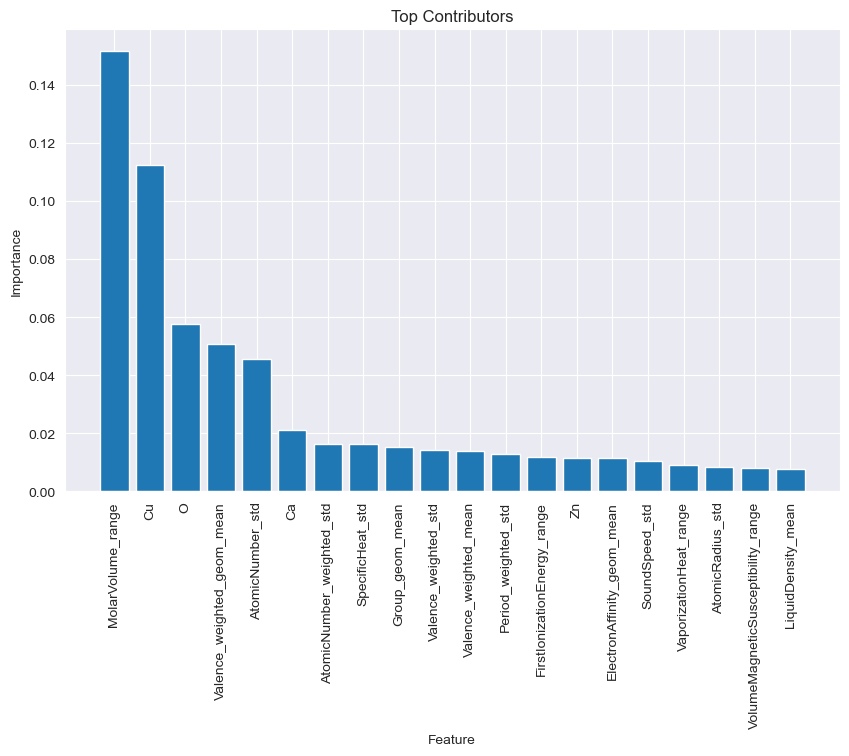

In [165]:
# Plot the feature importances of the model
# Get feature importances
importance = model.feature_importances_

# Create a DataFrame to store feature importances with column names
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top contributors
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_importances.head(20)['Feature'], sorted_feature_importances.head(20)['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top Contributors')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Potential direction 1: make similar software to Hamidieh that will predict Tc by inputting chemical formula (I'd need to decompose into dict, then get features, then run the model
# 2: Get more element-data.
# 3: Create double entries for entry_count
# 4: Tune the XGBoost model
# 5: Create a neural network model

In [ ]:
# Terrible way of being able to see the formula a guess and the real Tc
# X = updated_df.iloc[14100:14150,8:].values
# y = updated_df.iloc[14100:14150]['average_Tc'].values
# names = updated_df.iloc[14100:14150]['supercon_formula'].values
#
# predictions = model.predict(X)
# #
#
# for i, prediction in enumerate(predictions):
#    print(f"Formula: {names[i]}, Predicted Tc: {prediction}, Real Tc: {y[i]}")

In [ ]:
from numpy import nanmean, nanstd, log, ptp
from scipy.stats import gmean

# We are going to create a 3D space with coordinates (material_name, property, feature)
data = np.empty((9, 36, 14070), dtype=object)
data.fill(None)

# Get intermediate variables to calculate features
elem_row = unique_mat_df_exploded.iloc[:, 5:86]
mask = elem_row.notna()
n_atoms = np.nansum(elem_row.values, axis=1)
n_elements = np.sum(mask, axis=1)
p_list = elem_row.values / n_atoms[:, np.newaxis]


# # Iterate over every material
# for material_index, row in unique_mat_df_exploded.iterrows():
#     material_formula = row[0]

#     t_list = element_data[element_data['Element'].isin(elem_row.loc[material_index][mask.loc[material_index]].index)][element_data.columns[1:]].values.flatten()
#     w_list = t_list / np.sum(t_list)

#     data[0, :, material_index] = nanmean(t_list, axis=0)
#     data[1, :, material_index] = np.dot(t_list, p_list[material_index])
#     data[2, :, material_index] = gmean(t_list)
#     data[3, :, material_index] = np.prod(np.power(t_list, p_list[material_index]))
#     data[4, :, material_index] = -np.sum(w_list * np.log(w_list))
#     data[5, :, material_index] = ptp(t_list)
#     data[6, :, material_index] = ptp(t_list * p_list[material_index])
#     data[7, :, material_index] = nanstd(t_list, ddof=1)
#     data[8, :, material_index] = DescrStatsW(t_list, weights=p_list[material_index], ddof=1).std


In [ ]:
# Example Series with NaN values
series = pd.Series([1, 2, np.nan, 4, 5, 6, 7, np.nan, 9, 10, np.nan, 12])

# Create a Boolean mask for non-null entries
mask = series.notna()

# Iterate over the non-null entries preserving the original index
for index, value in series[mask].iteritems():
    print(f"Index: {index}, Value: {value}")

In [ ]:
row = unique_mat_df_exploded.iloc[1]
row = row[5:86]
mask = row.notna()
print(len(row[mask]))
atom_name_list = []
p_list = []

for index1, value1 in elem_row[mask].iteritems():
  atom_name_list.append(index1)
  #p_list.append((value1)/(n_atoms))

  # Iterate over every *property*
  for property_index, property_name in enumerate(element_data.columns):
    print(property_name)
    print(property_index)
    t_list = []

    # Go through the atoms
    for index2, value2 in elem_row[mask].iteritems():

      # Find the row where 'Element' matches the value of index2
      element_row = element_data[element_data['Element'] == index2]

      # Extract the value from the specified column (property_name)
      property_value = element_row[property_name].values[0]

      # Append the property value to t_list
      t_list.append(property_value)

    p_list = np.array(p_list)
    t_list = np.array(t_list)

    print(t_list)
    w_list = t_list / np.sum(t_list) # Could be wrong

In [ ]:
t_list = np.array([1,2,3,3,4])
p_list = np.array([53,4,83,2,3,1])
print(t_list / np.sum(t_list))